# Capstone #2: Modeling

The notebook shows the design abd comparison of various models to predict tht elength of the ICU stay from the `LengthOfStay.csv` data set.  This data set has already been cleaned, scaled and split in previous notebooks.

If necessary, remove the line comment delineater to install the following libraries.

In [ ]:
# %pip install --upgrade xgboost
# %pip install lightgbm
# %pip install catboost

Import the following libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.inspection import permutation_importance
from sb_utils import save_file

Read the split data sets into the appropriate variables.

In [113]:
X_train = pd.read_csv('LengthOfStay_Xtrain.csv')
X_test = pd.read_csv('LengthOfStay_Xtest.csv')
y_train = pd.read_csv('LengthOfStay_ytrain.csv')
y_test = pd.read_csv('LengthOfStay_ytest.csv')
X_train.head()

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,...,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,readmission_int
0,0,0,0,0,0,0,0,0,0,0,...,0.405541,-0.388013,1.972879,1.071466,1.639717,-0.409788,0.081591,-0.982775,0.010962,-0.724748
1,0,0,0,0,0,0,0,0,0,0,...,-1.169239,0.284490,-0.102962,-0.593133,-0.187704,-0.263720,0.071832,0.391208,0.010962,1.867584
2,1,0,1,0,0,1,0,0,0,0,...,-1.956629,-1.209962,-0.707863,1.307013,1.591627,0.776118,-0.626783,0.305334,-1.572460,-0.076665
3,0,0,0,0,0,0,0,0,0,0,...,-0.037366,-0.145165,0.631417,-0.456319,-0.187704,-0.595490,0.374475,-0.381657,0.010962,-0.076665
4,0,0,0,0,0,0,0,0,0,0,...,-1.021603,1.834983,1.397983,-0.275216,-0.187704,0.171147,-1.632482,0.219460,0.010962,-0.724748


## Screening Models

In the first stage, I'll test the following regression models with default hyperparameters to determine which model gives the best starting point.  The models will be evaluated using the Mean Absolute Error (MAE) and R-squared metrics.

1. Linear Regression
2. Support Vector Machine (SVM)
3. Random Forest Regressor
4. Gradient Boot Regressor

### 1. Linear Regression

In [114]:
y_train = y_train.values.ravel()

In [107]:
#Run default linear regression on dataset
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7629027814305008

In [108]:
#Determine MAE with test data
y_pred_LR = np.array(LR.predict(X_test))
mae_LR = mean_absolute_error(y_test, y_pred_LR)
print(f'Linear Regression MAE: {mae_LR}')

Linear Regression MAE: 0.8774046632565952


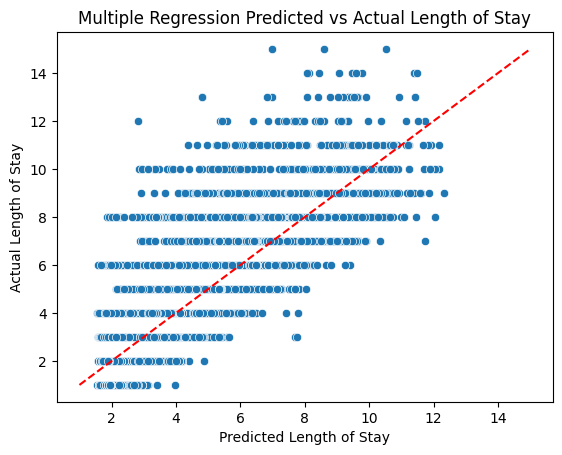

In [ ]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_LR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Multiple Regression Predicted vs Actual Length of Stay')
plt.show()

### 2. Support Vector Machine (SVM)

In [116]:
#Run default SVM on dataset
SR = LinearSVR(max_iter=10000)
SR.fit(X_train, y_train)
SR.score(X_train, y_train)

0.7506020456247855

In [117]:
#Determine MAE with test data
y_pred_SR = np.array(SR.predict(X_test))
mae_SR = mean_absolute_error(y_test, y_pred_SR)
print(f'SVM MAE: {mae_SR}')

SVM MAE: 0.8537333365420724


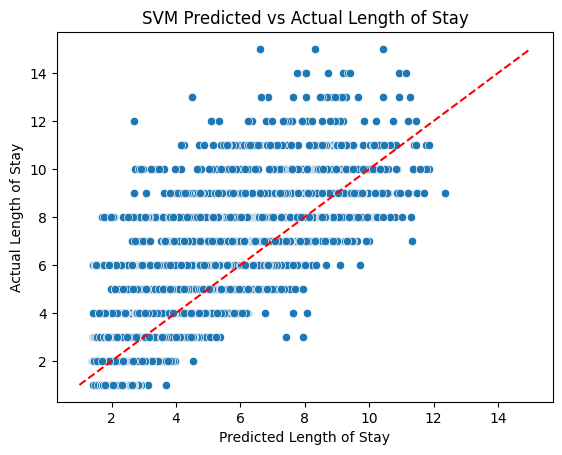

In [118]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_SR, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('SVM Predicted vs Actual Length of Stay')
plt.show()

### 3. Random Forest Regressor

In [109]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF.score(X_train, y_train)

0.989080404487373

In [110]:
#Determine MAE with test data
y_pred_RF = np.array(RF.predict(X_test))
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print(f'Random Forest MAE: {mae_RF}')

Random Forest MAE: 0.3964035052618943


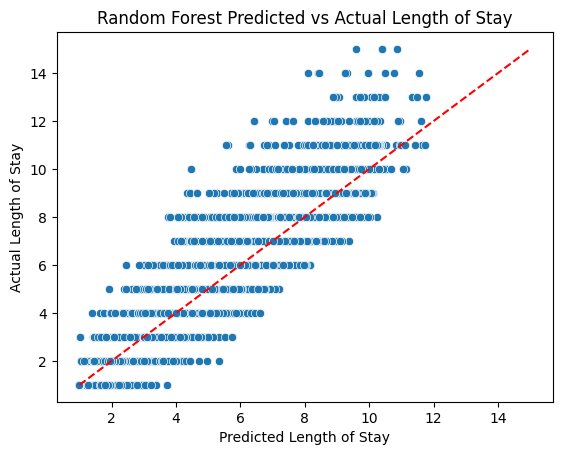

In [119]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RF, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Predicted vs Actual Length of Stay')
plt.show()

### 4. Gradient Boost Regressor

Here we will compare multple types of Gradient Boost algorithms:
- GradientBoostRegressor
- XGBoost
- LiteGBM
- CatBoost

In [121]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB.score(X_train, y_train)

0.9354995681921779

In [122]:
#Determine MAE with test data
y_pred_GB = np.array(GB.predict(X_test))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
print(f'Gradient Boost Regressor MAE: {mae_GB}')

Gradient Boost Regressor MAE: 0.448570980219628


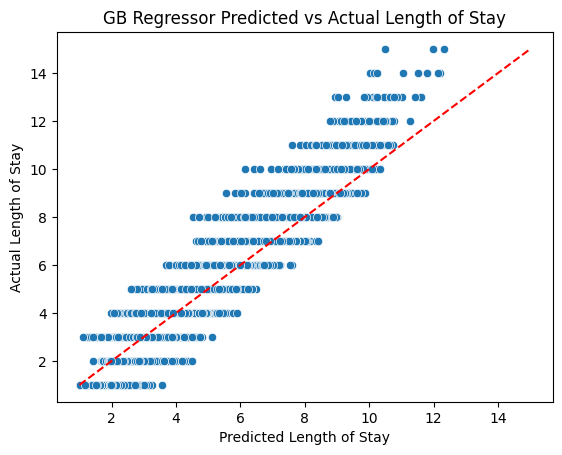

In [123]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_GB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('GB Regressor Predicted vs Actual Length of Stay')
plt.show()

In [124]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
XG.score(X_train, y_train)

0.97540682554245

In [125]:
#Determine MAE with test data
y_pred_XG = np.array(XG.predict(X_test))
mae_XG = mean_absolute_error(y_test, y_pred_XG)
print(f'Gradient Boost Regressor MAE: {mae_XG}')

Gradient Boost Regressor MAE: 0.3351593315601349


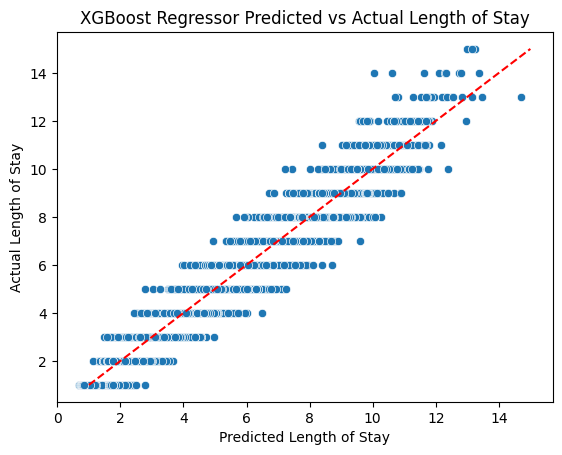

In [126]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

In [127]:
LG = LGBMRegressor()
LG.fit(X_train, y_train)
LG.score(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 74971, number of used features: 36
[LightGBM] [Info] Start training from score 3.998293


0.9645075287307978

In [128]:
#Determine MAE with test data
y_pred_LG = np.array(LG.predict(X_test))
mae_LG = mean_absolute_error(y_test, y_pred_LG)
print(f'Gradient Boost Regressor MAE: {mae_LG}')

Gradient Boost Regressor MAE: 0.33833656261498685


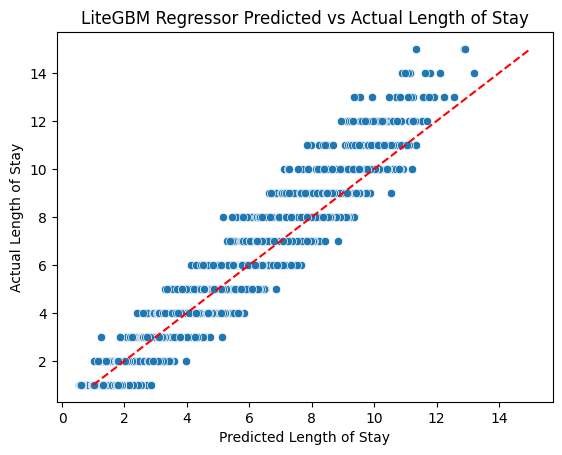

In [129]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_LG, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('LiteGBM Regressor Predicted vs Actual Length of Stay')
plt.show()

In [130]:
CB = CatBoostRegressor()
CB.fit(X_train, y_train)
CB.score(X_train, y_train)

Learning rate set to 0.080987
0:	learn: 2.2261905	total: 24.9ms	remaining: 24.9s
1:	learn: 2.1054905	total: 50.5ms	remaining: 25.2s
2:	learn: 1.9979225	total: 72.3ms	remaining: 24s
3:	learn: 1.8992100	total: 106ms	remaining: 26.5s
4:	learn: 1.8080113	total: 126ms	remaining: 25s
5:	learn: 1.7272157	total: 145ms	remaining: 24s
6:	learn: 1.6563638	total: 165ms	remaining: 23.4s
7:	learn: 1.5902243	total: 183ms	remaining: 22.6s
8:	learn: 1.5299196	total: 204ms	remaining: 22.4s
9:	learn: 1.4762804	total: 219ms	remaining: 21.7s
10:	learn: 1.4270153	total: 238ms	remaining: 21.4s
11:	learn: 1.3815949	total: 258ms	remaining: 21.3s
12:	learn: 1.3417733	total: 273ms	remaining: 20.7s
13:	learn: 1.3070942	total: 303ms	remaining: 21.3s
14:	learn: 1.2728278	total: 329ms	remaining: 21.6s
15:	learn: 1.2433412	total: 352ms	remaining: 21.6s
16:	learn: 1.2153707	total: 367ms	remaining: 21.2s
17:	learn: 1.1883945	total: 384ms	remaining: 20.9s
18:	learn: 1.1617742	total: 402ms	remaining: 20.7s
19:	learn: 1.1

np.float64(0.9772169232828124)

In [131]:
#Determine MAE with test data
y_pred_CB = np.array(CB.predict(X_test))
mae_CB = mean_absolute_error(y_test, y_pred_CB)
print(f'Gradient Boost Regressor MAE: {mae_CB}')

Gradient Boost Regressor MAE: 0.2940773609760559


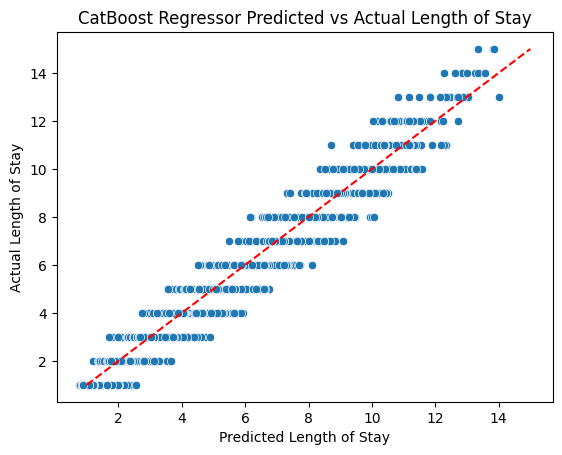

In [132]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CB, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Regressor Predicted vs Actual Length of Stay')
plt.show()

### Summary of Model Screening 

In [133]:
MAE_dict = {'Multiple Linear Regression': mae_LR, 'SVM Regressor': mae_SR, 'Random Forest Regressor': mae_RF, 
            'Gradient Boost Regressor': mae_GB, 'XGBoost Regressor': mae_XG, 'LiteGBM Regressor': mae_LG, 'CatBoost Regressor': mae_CB}
Rsquared_dict = {'Multiple Linear Regression': LR.score(X_train, y_train), 'SVM Regressor': SR.score(X_train, y_train), 
                 'Random Forest Regressor': RF.score(X_train, y_train), 'Gradient Boost Regressor': GB.score(X_train, y_train), 
                 'XGBoost Regressor': XG.score(X_train, y_train), 'LiteGBM Regressor': LG.score(X_train, y_train), 'CatBoost Regressor': CB.score(X_train, y_train)}
Comment_dict = {'Multiple Linear Regression': 'No', 'SVM Regressor': 'No', 'Random Forest Regressor': 'No', 
            'Gradient Boost Regressor': 'No', 'XGBoost Regressor': 'Yes', 'LiteGBM Regressor': 'Yes', 'CatBoost Regressor': 'Yes'}
summary = pd.DataFrame({'MAE': MAE_dict, 'R²': Rsquared_dict, 'Accurate for Long Stays?': Comment_dict})
summary

,MAE,R²,Accurate for Long Stays?
Multiple Linear Regression,0.877405,0.762903,No
SVM Regressor,0.853733,0.750602,No
Random Forest Regressor,0.396404,0.989080,No
Gradient Boost Regressor,0.448571,0.935500,No
XGBoost Regressor,0.335159,0.975407,Yes
LiteGBM Regressor,0.338337,0.964508,Yes
CatBoost Regressor,0.294077,0.977217,Yes


In this table, we can compare the error and R-squared metrics for all seven models that were tested above.  In addition, I have added a more subjective metric, which was whether the model maintained accuracy when prediciting the length of stay for patients in the test data with longer ICU stays.  When examining the scatter plots, I noticed that some models were specifically under estimating the longer admissions.  This was clearest for Random Forest and the Gradient Boost Regressor, where accuracy overall was good enough for the trend to be visible.  From a business perspecitive, it is plausible that accurate predictions for long stays would be mort important than shorter stays.  In fact the entire purpose of the project could be to pick out the patients who will stays over 10 days, or someting similar.  For this reason, I think it is important to keep this in mind when evaluating these models.

As one would anticipate, these results show a clear improvement in MAE and R-squared as we move from base learners like Linear Regression and SVM to ensemble learers like Random Forest and Gradient Boosting.  Even within Gradient Boosting, there is a clear improvement from the Gradient Boost Regressor through newer learners like CatBoost.

CatBoost Regressor is a clear choice for moving forward in this project, as it has the lowest error, a very high Rsquared and maintains accuracy for longer hospital stays.  In addition, I will select the XGBoost Regressor and Random Forest Regressor for further development.  These will be included as a point of comparison to the CatBoost Regressor (and for my own education).

# Model Building

In the following section, I will building three complete models and compare the final results using the following learners:

1. Random Foorest Regressor
2. XGBoost Regressor
3. CatBoost Regressor

For each model, I will show:

1. Hyperparameter tuning using RandomizedSearchCV
2. Model training using the optimal parameters
3. Model assessment

## Random Forest

In [57]:
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.25, 0.5, 0.75, 1.0, 'sqrt'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    }

RF = RandomForestRegressor()
RF_cv= RandomizedSearchCV(RF,param_grid_RF, cv=5, scoring='neg_mean_absolute_error')
RF_cv.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': [0.25, 0.5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,10
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [58]:
results_RF = pd.DataFrame(RF_cv.cv_results_)
top_10_RF = results_RF.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_RF['params'])
top_10_full_RF = pd.concat([top_10_RF[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_full_RF['Mean MAE'] = top_10_full_RF['mean_test_score']*-1
top_10_full_RF = top_10_full_RF.drop('mean_test_score', axis=1)
top_10_full_RF

,rank_test_score,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,Mean MAE
0,1,200,5,2,0.5,20,0.452518
1,2,100,5,5,0.75,10,0.687260
2,3,100,10,2,0.25,10,0.703450
3,4,100,2,10,0.25,10,0.703936
4,5,100,5,5,sqrt,10,0.774270
5,6,300,5,5,0.5,5,0.866083
6,7,200,20,10,0.5,5,0.866837
7,8,100,5,2,0.5,5,0.868721
8,9,200,10,10,0.75,5,0.871432
9,10,100,10,1,1.0,5,0.895882


In [4]:
RF_model = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=.25, max_depth=None)
RF_model = RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

In [5]:
y_pred_RFmodel = RF_model.predict(X_test)
Rsquared_RFmodel = RF_model.score(X_train, y_train)
mea_RFmodel = mean_absolute_error(y_test, y_pred_RF)
RMSE_RFmodel = root_mean_squared_error(y_test, y_pred_RF)
RF_model_metrics = {'R-squared': Rsquared_RFmodel, 'MAE': mea_RFmodel, 'RMSE':RMSE_RFmodel}
RF_model_metrics

{'R-squared': 0.9779924582528988,
 'MAE': 0.41552658616371474,
 'RMSE': 0.6466663112425062}

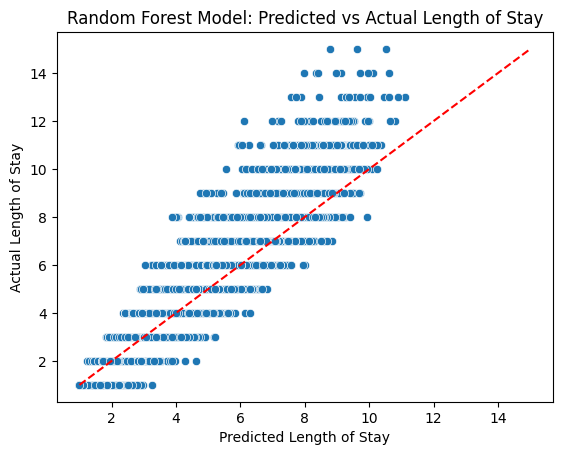

In [6]:
#Plot actual y_test vs predicted y_pred in scatterplot
y_test_1D = y_test.values.ravel()
sns.scatterplot(x=y_pred_RFmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('Random Forest Model: Predicted vs Actual Length of Stay')
plt.show()

In [ ]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_RF = permutation_importance(RF_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

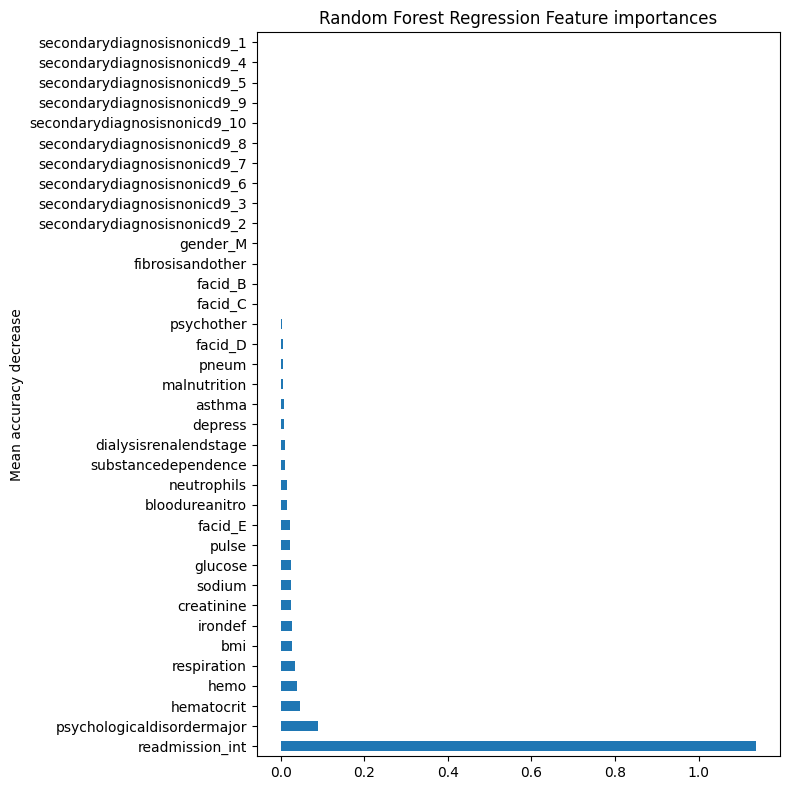

In [ ]:
#Transform feature importance data into series for plotting
importances_mean_RF = pd.Series(perm_RF.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_RF = pd.Series(perm_RF.importances_std, index=feature_names).loc[importances_mean_RF.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_RF, ax=ax)
ax.set_title("Random Forest Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Hyperparameter tuning was unable to sufficiently improve the predictions from the Random Forest Regressor learner.  When the predictions were plotted against the y_test actual labels, it appears that parameter tuning tighteded the variance of the predictions but could not address the issue of under estimating the high end of range of admission lengths. 

## XGBoost Regressor

In [24]:
param_grid_XGB = {
    'learning_rate': np.arange(0.01, 1, 0.1),
    'min_child_weight': [10, 25, 50, 75, 100],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1],
    'n_estimators': [200, 250, 300, 350]
}
XGB = XGBRegressor()
XGB_cv = RandomizedSearchCV(estimator=XGB, param_distributions=param_grid_XGB, cv=5, scoring='neg_mean_absolute_error')

XGB_cv.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.5, 0.7, ...], 'learning_rate': array([0.01, ..., 0.81, 0.91]), 'max_depth': [3, 4, ...], 'min_child_weight': [10, 25, ...], ...}"
,n_iter,10
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [45]:
results_XGB = pd.DataFrame(XGB_cv.cv_results_)
top_10_XGB = results_XGB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_XGB['params'])
top_10_XGB_full = pd.concat([top_10_XGB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_XGB_full['Mean MAE'] = top_10_XGB_full['mean_test_score']*-1
top_10_XGB_full = top_10_XGB_full.drop('mean_test_score', axis=1)
top_10_XGB_full

,rank_test_score,n_estimators,min_child_weight,max_depth,learning_rate,colsample_bytree,Mean MAE
0,1,300,50,10,0.21,0.7,0.319047
1,2,300,100,6,0.21,1.0,0.322131
2,3,200,10,10,0.11,0.5,0.322600
3,4,200,100,7,0.11,0.9,0.323784
4,5,250,25,4,0.21,1.0,0.337420
5,6,350,10,11,0.31,0.7,0.341597
6,7,350,100,10,0.61,0.7,0.383548
7,8,250,50,7,0.91,0.7,0.400128
8,9,350,75,11,0.81,0.8,0.438553
9,10,200,100,10,0.91,1.0,0.444688


In [26]:
XGB_model = XGBRegressor(n_estimators=300, min_child_weight=50, learning_rate=0.21, colsample_bytree=0.7, max_depth=10)
XGB_model = XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)

In [27]:
y_pred_XGBmodel = XGB_model.predict(X_test)
Rsquared_XGBmodel = XGB_model.score(X_train, y_train)
mea_XGBmodel = mean_absolute_error(y_test, y_pred_XGB)
RMSE_XGBmodel = root_mean_squared_error(y_test, y_pred_XGB)
XGB_model_metrics = {'R-squared': Rsquared_XGBmodel, 'MAE': mea_XGBmodel, 'RMSE':RMSE_XGBmodel}
XGB_model_metrics

{'R-squared': 0.9878109693527222,
 'MAE': 0.31357118487358093,
 'RMSE': 0.4385029971599579}

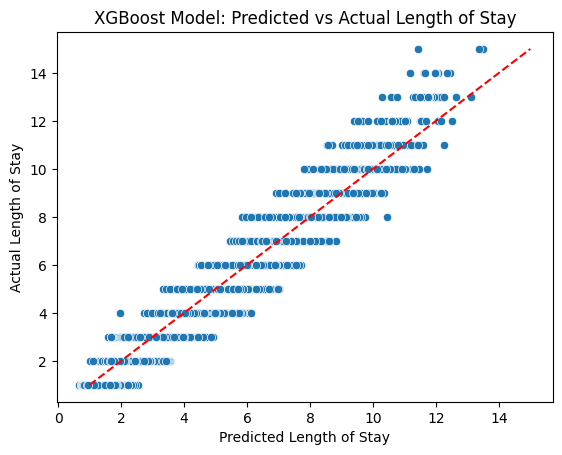

In [28]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_XGBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('XGBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [29]:
#Calculate the relative features importances using permutation_importance
feature_names = X_test.columns
perm_XGB = permutation_importance(XGB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

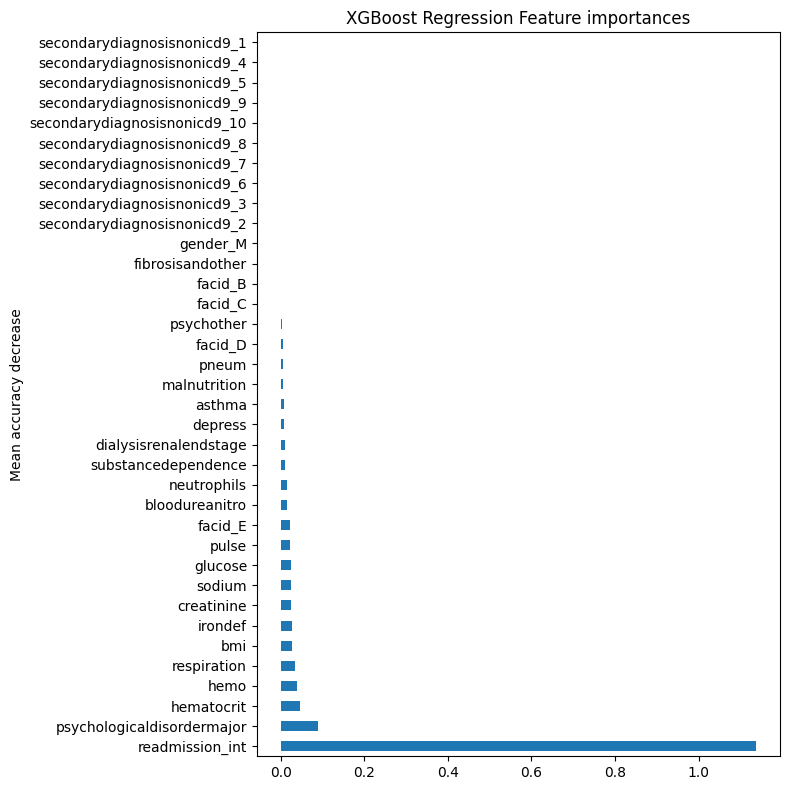

In [31]:
#Transform feature importance data into series for plotting
importances_mean_XGB = pd.Series(perm_XGB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_XGB = pd.Series(perm_XGB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_RF.plot.barh(yerr=importances_std_XGB, ax=ax)
ax.set_title("XGBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## CatBoost Regressor

In [ ]:
param_grid_CB = {
    'learning_rate': [.001, .005, .01, .03, .05, .1],
    'depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'iterations': [500, 750, 1000, 1250],
    'l2_leaf_reg': [3, 6, 7, 8, 9, 10],
    'random_strength' : [1, 2, 5, 10]
}
CB = CatBoostRegressor()
CB_cv = RandomizedSearchCV(estimator=CB, param_distributions=param_grid_CB, cv=5, scoring='neg_mean_absolute_error')

CB_cv.fit(X_train, y_train)

In [44]:
results_CB = pd.DataFrame(CB_cv.cv_results_)
top_10_CB = results_CB.sort_values(by='mean_test_score', ascending=False).head(10)
params_expanded = pd.json_normalize(top_10_CB['params'])
top_10_CB_full = pd.concat([top_10_CB[["rank_test_score", "mean_test_score"]].reset_index(drop=True), params_expanded.reset_index(drop=True)], axis=1)
top_10_CB_full['Mean MAE'] = top_10_CB_full['mean_test_score']*-1
top_10_CB_full = top_10_CB_full.drop('mean_test_score', axis=1)
top_10_CB_full

,rank_test_score,random_strength,learning_rate,l2_leaf_reg,iterations,depth,Mean MAE
0,1,10,0.05,6,1000,11,0.288483
1,2,5,0.05,8,1250,8,0.289101
2,3,2,0.05,3,1000,12,0.289316
3,4,2,0.03,6,750,8,0.303447
4,5,1,0.05,3,750,6,0.307810
5,6,1,0.01,9,750,10,0.361331
6,7,10,0.03,7,750,6,0.363518
7,8,2,0.01,6,750,9,0.380195
8,9,2,0.03,6,750,3,0.418753
9,10,1,0.01,7,750,6,0.421852


In [134]:
CB_model = CatBoostRegressor(learning_rate=0.05, random_strength=10, depth = 11, l2_leaf_reg=6, iterations=1000)
CB_model = CB_model.fit(X_train, y_train)
y_pred_CBmodel = CB_model.predict(X_test)

0:	learn: 2.2871085	total: 247ms	remaining: 4m 6s
1:	learn: 2.2146410	total: 387ms	remaining: 3m 13s
2:	learn: 2.1419624	total: 654ms	remaining: 3m 37s
3:	learn: 2.0737273	total: 830ms	remaining: 3m 26s
4:	learn: 2.0166242	total: 1.01s	remaining: 3m 21s
5:	learn: 1.9579574	total: 1.18s	remaining: 3m 15s
6:	learn: 1.9014327	total: 1.38s	remaining: 3m 15s
7:	learn: 1.8537885	total: 1.6s	remaining: 3m 18s
8:	learn: 1.8010763	total: 1.83s	remaining: 3m 21s
9:	learn: 1.7554626	total: 2.04s	remaining: 3m 21s
10:	learn: 1.7118847	total: 2.21s	remaining: 3m 18s
11:	learn: 1.6702761	total: 2.37s	remaining: 3m 15s
12:	learn: 1.6286225	total: 2.5s	remaining: 3m 9s
13:	learn: 1.5909961	total: 2.52s	remaining: 2m 57s
14:	learn: 1.5547210	total: 2.72s	remaining: 2m 58s
15:	learn: 1.5218095	total: 2.88s	remaining: 2m 56s
16:	learn: 1.4881195	total: 3.04s	remaining: 2m 55s
17:	learn: 1.4548956	total: 3.18s	remaining: 2m 53s
18:	learn: 1.4312703	total: 3.25s	remaining: 2m 47s
19:	learn: 1.4035121	total

In [ ]:
Rsquared_CBmodel = CB_model.score(X_train, y_train)
mea_CBmodel = mean_absolute_error(y_test, y_pred_CBmodel)
RMSE_CBmodel = root_mean_squared_error(y_test, y_pred_CBmodel)
CB_model_metrics = {'R-squared': Rsquared_CBmodel, 'MAE': mea_CBmodel, 'RMSE':RMSE_CBmodel}
CB_model_metrics

{'R-squared': np.float64(0.9837985547866464),
 'MAE': 0.2842504096805775,
 'RMSE': 0.40702883361493813}

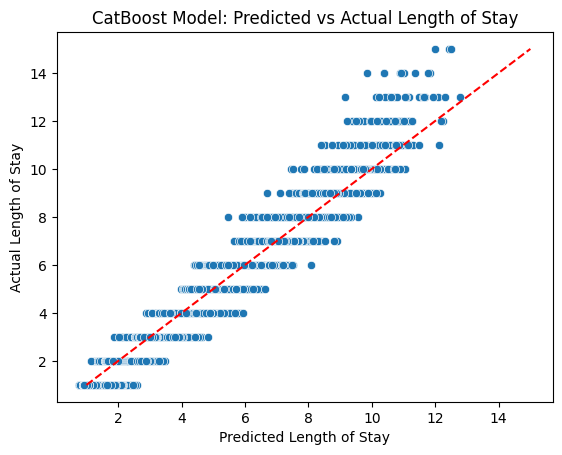

In [ ]:
#Plot actual y_test vs predicted y_pred in scatterplot
sns.scatterplot(x=y_pred_CBmodel, y=y_test_1D)

# Add a line for perfect correlation.
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--', color='red')

# Label it nicely
plt.xlabel('Predicted Length of Stay')
plt.ylabel('Actual Length of Stay')
plt.title('CatBoost Model: Predicted vs Actual Length of Stay')
plt.show()

In [64]:
#Calculate the relative features importances using permutation_importance
perm_CB = permutation_importance(CB_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

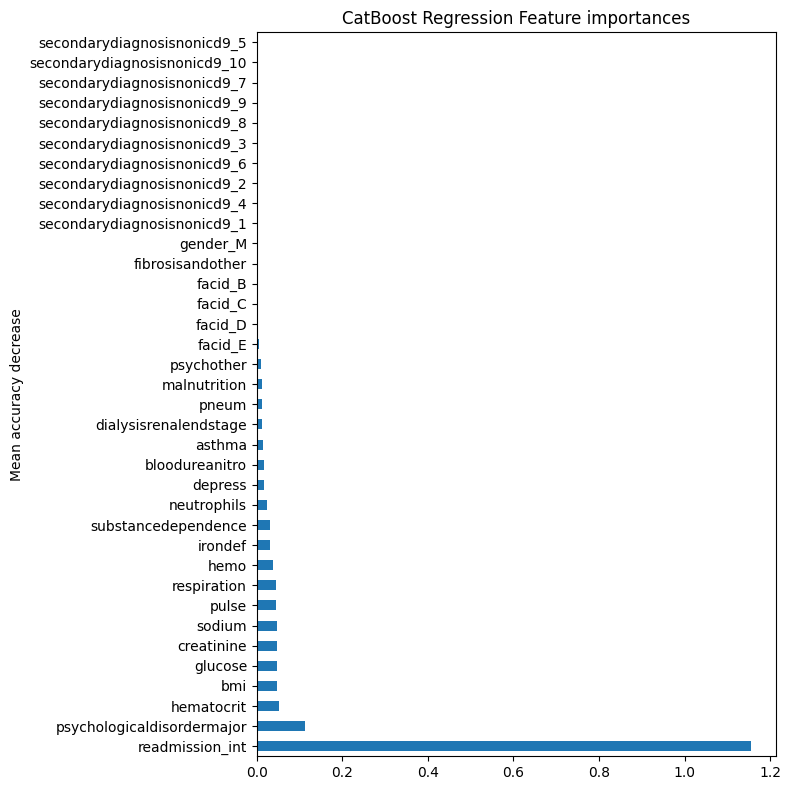

In [77]:
#Transform feature importance data into series for plotting
importances_mean_CB = pd.Series(perm_CB.importances_mean, index=feature_names).sort_values(ascending=False)
importances_std_CB = pd.Series(perm_CB.importances_std, index=feature_names).loc[importances_mean_XGB.index]

#Plot feature importances
fig, ax = plt.subplots(figsize=(8,8))
importances_mean_CB.plot.barh(yerr=importances_std_CB, ax=ax)
ax.set_title("CatBoost Regression Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Model Selection

### Summary of Model Building

In [66]:
summary_models = pd.DataFrame({'Random Forest regressor': RF_model_metrics, 'XGBoost Regressor': XGB_model_metrics, 'CatBoost Regressor': CB_model_metrics})
summary_models

,Random Forest regressor,XGBoost Regressor,CatBoost Regressor
R-squared,0.977992,0.987811,0.983799
MAE,0.415527,0.313571,0.284250
RMSE,0.646666,0.438503,0.407029


- Random Forest Regressor: Hyperparameter tuning was unable to improve the results of the Random Forest learner for the longer admissions in our test dataset.  This model was the worst of the three and will not be continued.
- XGBoost Regressor: Hyperparameter tuning yeilded modest improvements in R-squared and MAE metrics.  However, this model appeared to be the most accurate for admissions above 10 days.
- CatBoost Regressor: This model had the lowest MAE, both at defalut hyperparameters (MAE=29.4) and after hyperparameter tuning (MAE=28.8).  However, visual inspection of the scatter plot comparing actual to predicted labels for test data suggests that hyperparameter tuning led to underestimation of admissions above 10 days, even as the mean MAE decreased.

To better compare the models for longer admissions, I'll look at MAE for stays above and below 10 days.

In [135]:
y_test = np.asarray(y_test).ravel()
ytest_lt_10 = y_test < 10
ytest_ge_10 = y_test >= 10

models = ['Random Forest default', 'Random Forest model', 'XGBoost default', 'XGBoost model','CatBoost default', 'CatBoost model']
y_pred_list = [y_pred_RF, y_pred_RFmodel, y_pred_XG, y_pred_XGBmodel, y_pred_CB, y_pred_CBmodel]
MAE_lt_10 = []
MAE_ge_10 = []
for ypred in y_pred_list:
    ypred=np.asarray(ypred).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], ypred[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], ypred[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10 = pd.DataFrame({'MAE < 10 days':MAE_lt_10, 'MAE >= 10 days':MAE_ge_10}, index=models)

In [103]:
summary_10

,MAE < 10 days,MAE >= 10 days
Random Forest default,0.389067,2.038061
Random Forest model,0.389067,2.038061
XGBoost default,0.328586,0.738226
XGBoost model,0.306385,0.754233
CatBoost default,0.290250,0.528774
CatBoost model,0.274464,0.884345


These results clearly show that the default CatBoost settings is the learner with the lowest error for admissions of 10 or more days.  Given that these stays are most likely to be important from a business perspective, I recommend using CatBoost with default settings as the final model.

During our model building, we collected data on the features which were most important to each model.  

In [ ]:
# Loop through features lists of the top 10 t0 t0p 30 features to determine how many features are needed to maintain MAE in the CatBoost learner.
MAE_lt_10 = []
MAE_ge_10 = []
features = range(10, 31)
for i in features:
    X_train_short = X_train[importances_mean_CB.index[:i]]
    X_test_short = X_test[importances_mean_CB.index[:i]]
    CB_short = CatBoostRegressor()
    CB_short.fit(X_train_short, y_train)
    y_pred_CBshort = CB_short.predict(X_test_short)
    y_pred_CBshort=np.asarray(y_pred_CBshort).ravel()
    mae_lt_10 = mean_absolute_error(y_test[ytest_lt_10], y_pred_CBshort[ytest_lt_10])
    mae_ge_10 = mean_absolute_error(y_test[ytest_ge_10], y_pred_CBshort[ytest_ge_10])
    MAE_lt_10.append(mae_lt_10)
    MAE_ge_10.append(mae_ge_10)
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)

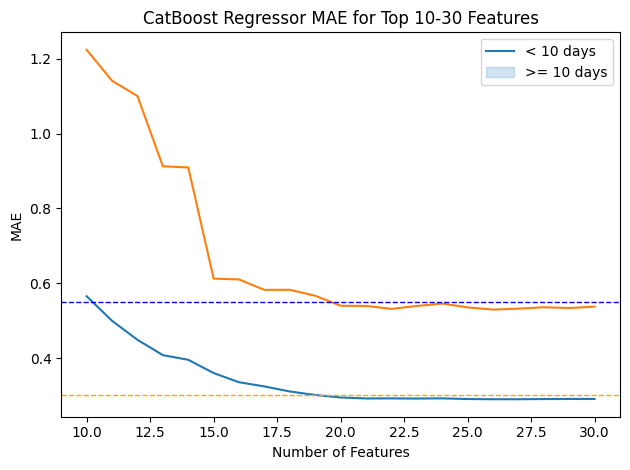

In [101]:
summary_10short = pd.DataFrame({'MAE < 10':MAE_lt_10, 'MAE >= 10':MAE_ge_10}, index=features)
sns.lineplot(data=summary_10short, x=features, y='MAE < 10')
sns.lineplot(data=summary_10short, x=features, y='MAE >= 10')
plt.axhline(y=0.55, color='blue', linestyle='--', linewidth=1)
plt.axhline(y=0.3, color='orange', linestyle='--', linewidth=1)
plt.title('CatBoost Regressor MAE for Top 10-30 Features')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.legend(["< 10 days", ">= 10 days"], loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
# Print specific MAE value for 15 features
summary_10short.loc[15]

MAE < 10     0.359820
MAE >= 10    0.612283
Name: 15, dtype: float64

In [140]:
# Print specific MAE value for 15 features
summary_10short.loc[20]

MAE < 10     0.294591
MAE >= 10    0.539755
Name: 20, dtype: float64

Based on the above plot, the CatBoostRegressor learner requires the top 20 features to maintain MAE below 0.55 for the admissions of 10 or more days and MAE below 0.3 for admissions below 10 days.  The client could also use the top 15 features if this level of accuracy is not required. In descending order, the top 20 features are as follows:
- Number of Readmissions
- Psychological Disorder (Yes/No)
- Hemotocrit
- BMI
- Glucose
- Creatinine
- Sodium
- Pulse
- Respriation
- Hemo
- Iron Deficiency (Yes/No)
- Substance Dependence (Yes/No)
- Neutrophils
- Depression (Yes/No)
- Blood Urea Nitrogen
- Asthma (Yes/No)
- Dialysis for End-Stage Renal Failure (Yes/No)
- Pneumonia (Yes/No)
- Malnutrition (Yes/No)
- Presence of Other Psychological Symptoms (Yes/No)

# Summary

This notebook describes how a model was built to predict the length of ICU admssions from the dataset `LengthOfStay.csv`.  This was acheived through the following steps:
1. Testing seven regression learners with default hyperparatmeters 
    - Learners were evaluated by MAE and R-squared, as well the subjective tendency to maintain accuracy for predicting admission over 10 days
    - CatBoost Regressor was the top candidate and was selected along with XGBoost and Random Forest
2. Hyperparameter tuning and model building for the top three learners
    - Hyperparatmeter tuning was done with RandomSearchCV over a purposefully broad range of values and parameters for each model, making sure that default value were included with the hyperparatmeter space
    - Hyperparameter tuning yielded modest improvements in MAE for all models, but had the side-effect of increasing MAE for longer stays at the expense of MAE over the entire testing dataset
    - CatBoost Regressor with default hyperparameters was the learner with the lower MAE for admissions of 10 or more days of all the learners tested
3. CatBoost Regressor with default settings was selected for the final model
    - To optimize efficiency, this model can be limited to the top 20 features without increasing the error
    - This model can operate with the top 15 features if desired with modest increases in error

In [143]:
# Define shorted training data sets
X_train_15 = X_train[importances_mean_CB.index[:15]]
X_train_20 = X_train[importances_mean_CB.index[:20]]
X_test_15 = X_test[importances_mean_CB.index[:15]]
X_test_20 = X_test[importances_mean_CB.index[:20]]

In [144]:
# save the data to a new csv file
datapath = 'C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2'
save_file(X_train_15, 'LengthOfStay_Xtrain_15.csv', datapath)
save_file(X_train_20, 'LengthOfStay_Xtrain_20.csv', datapath)
save_file(X_test_15, 'LengthOfStay_Xtest_15.csv', datapath)
save_file(X_test_20, 'LengthOfStay_Xtest_20.csv', datapath)


A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain_15.csv"
A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain_20.csv"
Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest_15.csv"
Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest_20.csv"
